In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
train_data_path = "/content/drive/MyDrive/prectice model/train"
validation_data_path = "/content/drive/MyDrive/prectice model/val"

In [3]:
def plotimages(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [4]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")


training_data = training_datagen.flow_from_directory(train_data_path,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

Found 172 images belonging to 6 classes.


In [5]:
training_data.class_indices

{'Acne': 0,
 'blister': 1,
 'cold sore': 2,
 'eczema': 3,
 'hives': 4,
 'rosacea': 5}

In [6]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode = "binary")

Found 68 images belonging to 6 classes.


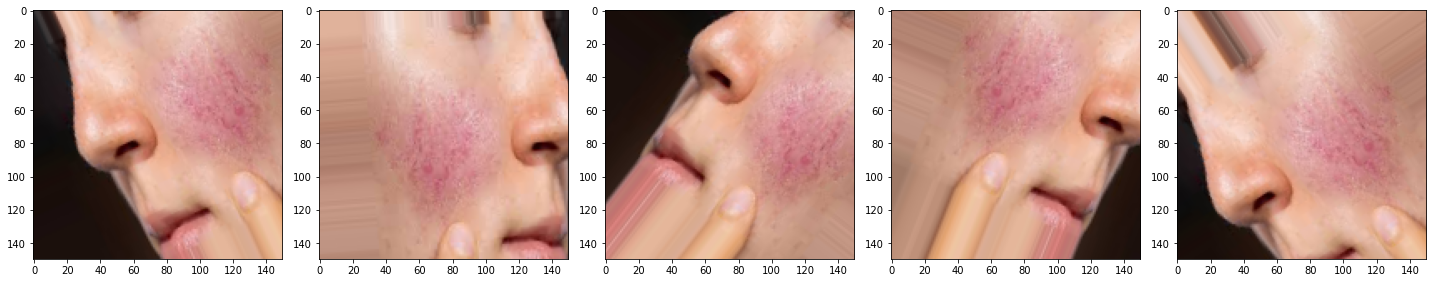

In [7]:
images = [training_data[0][0][0] for i in range(5)]
plotimages(images)

In [8]:
model_path = "/content/drive/MyDrive/prectice model/skin_disease_model5.h5"
checkpoint = ModelCheckpoint(model_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")
callbacks_list = [checkpoint]

In [9]:
cnn_model1 = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=128, activation="relu"),
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation="relu"),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=6, activation="softmax")
    
])

In [10]:
cnn_model1.compile(optimizer= Adam(lr=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [12]:
history = cnn_model1.fit(training_data,
                       epochs=150,
                       verbose=1,
                       validation_data= valid_data,
                       callbacks=callbacks_list)

Epoch 1/150
6/6 [==============================] - 66s 6s/step - loss: 1.8266 - accuracy: 0.1105 - val_loss: 1.7822 - val_accuracy: 0.1912

Epoch 00001: val_accuracy improved from -inf to 0.19118, saving model to /content/drive/MyDrive/prectice model/skin_disease_model5.h5
Epoch 2/150
6/6 [==============================] - 2s 335ms/step - loss: 1.8078 - accuracy: 0.1628 - val_loss: 1.8104 - val_accuracy: 0.1471

Epoch 00002: val_accuracy did not improve from 0.19118
Epoch 3/150
6/6 [==============================] - 2s 296ms/step - loss: 1.7949 - accuracy: 0.1337 - val_loss: 1.7954 - val_accuracy: 0.1471

Epoch 00003: val_accuracy did not improve from 0.19118
Epoch 4/150
6/6 [==============================] - 2s 286ms/step - loss: 1.7974 - accuracy: 0.1628 - val_loss: 1.7802 - val_accuracy: 0.2941

Epoch 00004: val_accuracy improved from 0.19118 to 0.29412, saving model to /content/drive/MyDrive/prectice model/skin_disease_model5.h5
Epoch 5/150
6/6 [==============================] - 2s

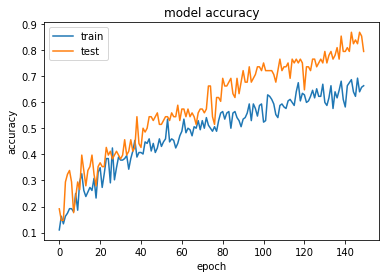

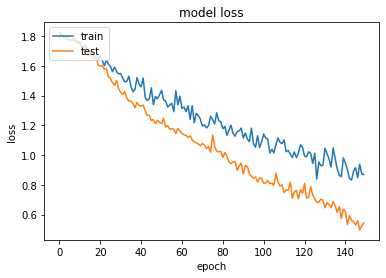

In [17]:
#accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

#loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()